<a href="https://colab.research.google.com/github/Arif111866/Digital-Image-Processing-4.1-Lab-/blob/main/Question_1/CG_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

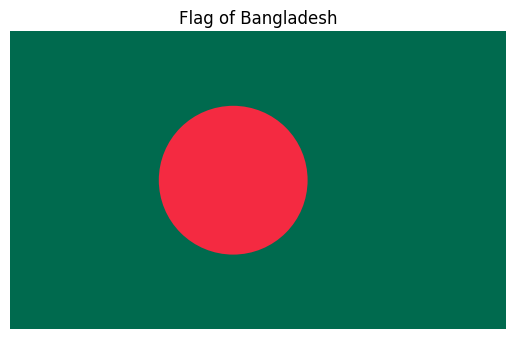

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to 10:6 (national flag's official proportion)
flag_width = 10
flag_height = 6
ax.set_xlim(0, flag_width)
ax.set_ylim(0, flag_height)
ax.set_aspect('equal')

# Draw the green rectangle (background)
green_rect = patches.Rectangle((0, 0), flag_width, flag_height, facecolor='#006a4e')  # Green
ax.add_patch(green_rect)

# Draw the red circle (slightly offset from center towards hoist)
circle_diameter = 3  # approx 40% of flag height
circle_radius = circle_diameter / 2
circle_center_x = flag_width * 9 / 20  # 9/20 of flag's length from the hoist
circle_center_y = flag_height / 2
red_circle = patches.Circle((circle_center_x, circle_center_y), circle_radius, facecolor='#f42a41')  # Red
ax.add_patch(red_circle)

# Remove axes
ax.axis('off')

# Show the flag
plt.title("Flag of Bangladesh")
plt.show()


In [ ]:
!pip install pillow


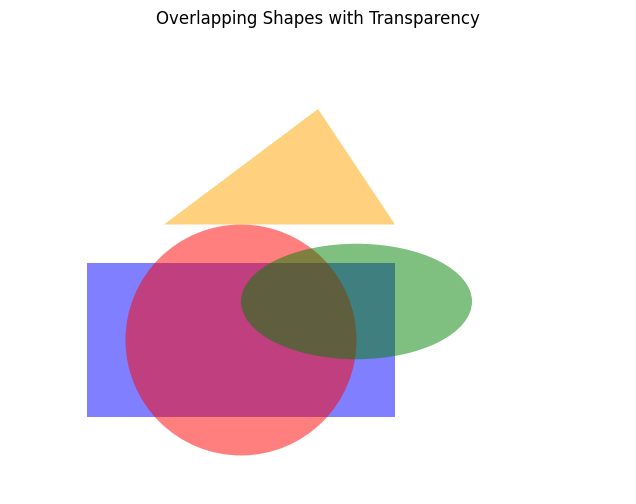

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon

# Create figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Rectangle
rect = Rectangle((1, 1), 4, 2, facecolor='blue', alpha=0.5, label='Rectangle')
ax.add_patch(rect)

# Circle overlapping with rectangle
circle = Circle((3, 2), 1.5, facecolor='red', alpha=0.5, label='Circle')
ax.add_patch(circle)

# Ellipse overlapping both
ellipse = Ellipse((4.5, 2.5), width=3, height=1.5, facecolor='green', alpha=0.5, label='Ellipse')
ax.add_patch(ellipse)

# Triangle (polygon)
triangle = Polygon([[2, 3.5], [4, 5], [5, 3.5]], closed=True, facecolor='orange', alpha=0.5, label='Triangle')
ax.add_patch(triangle)

# Set limits and aspect ratio
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Add title
plt.title("Overlapping Shapes with Transparency")

# Show plot
plt.show()


In [ ]:
from PIL import Image, ImageDraw, ImageSequence
import math
import random

# Constants
WIDTH, HEIGHT = 1080, 1920
NUM_FRAMES = 60
EARTH_RADIUS = 50

# Create background with stars
def create_background():
    bg = Image.new("RGB", (WIDTH, HEIGHT), (5, 5, 20))  # dark space
    draw = ImageDraw.Draw(bg)
    for _ in range(300):  # stars
        x = random.randint(0, WIDTH)
        y = random.randint(0, HEIGHT)
        r = random.randint(1, 3)
        draw.ellipse((x-r, y-r, x+r, y+r), fill=(255, 255, 255))
    return bg

# Create Earth circle
def draw_earth(x, y):
    img = Image.new("RGBA", (WIDTH, HEIGHT), (0, 0, 0, 0))
    draw = ImageDraw.Draw(img)
    draw.ellipse((x - EARTH_RADIUS, y - EARTH_RADIUS,
                  x + EARTH_RADIUS, y + EARTH_RADIUS), fill=(0, 102, 204))  # blue Earth
    return img

# Generate animation frames
frames = []
background = create_background()

for i in range(NUM_FRAMES):
    angle = (i / NUM_FRAMES) * 2 * math.pi
    earth_x = WIDTH // 2 + int(300 * math.cos(angle))
    earth_y = HEIGHT // 2 + int(200 * math.sin(angle * 1.5))

    frame = background.copy()
    earth = draw_earth(earth_x, earth_y)
    frame.paste(earth, (0, 0), earth)
    frames.append(frame)

# Save as GIF
frames[0].save("earth_galaxy.gif", save_all=True, append_images=frames[1:],
               duration=100, loop=0)
